In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter('ignore')

In [2]:
Nt = pd.read_csv(r"C:\Users\manoj\OneDrive\Desktop\Project\Netflix\netflix_titles.csv")  # Reading the csv file
Nt 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
Nt.info()  #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
Nt.describe(include = 'object')  # To find the number of unique values in each column

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [5]:
Nt.isnull().sum()  # To find the number of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
Null_percentage = Nt.isnull().sum()/len(Nt)*100 #percentage of null values
Null_percentage.round(2).sort_values(ascending = False) #percentage of null values sorted in descending order

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [7]:
Nt['director'].fillna('Unknown',inplace = True) #filling the null values with the mode of the column
Nt['cast'].fillna('Unknown',inplace = True) #filling the null values with the mode of the column

In [8]:
Nt['country'] = Nt['country'].fillna(Nt['country'].mode()[0]) #filling the null values with the mode of the column
Nt['country'] = Nt['country'].astype(str) #converting the column to string
Nt['country'] = Nt['country'].apply(lambda x: x.split('_')[0]) #converting the column to string

In [9]:
Nt['country'].value_counts() #checking the number of unique values in the column

United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [10]:
mode_i = ['date_added','rating','duration']  #list of columns to be filled with the mode of the column
for i in mode_i:  #looping through the list of columns to be filled with the mode of the column
    Nt[i].fillna(Nt[i].mode()[0],inplace = True) #filling the null values with the mode of the column

In [11]:
Nt['month'] = Nt['date_added'].apply(lambda x : x.lstrip().split()[0]) #converting the column to string
Nt['year'] = Nt['date_added'].apply(lambda x : x.split(',')[-1]) #converting the column to string

In [12]:
Nt['rating'].unique() #checking the number of unique values in the column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
Nt['rating'] = Nt['rating'].replace({'74 min':np.nan,'84 min':np.nan,'66 min':np.nan,
                                              'TV-Y7-FV':'TV-Y7'}) #replacing the null values with the mode of the column
Nt['rating'].unique() #checking the number of unique values in the column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'UR'], dtype=object)

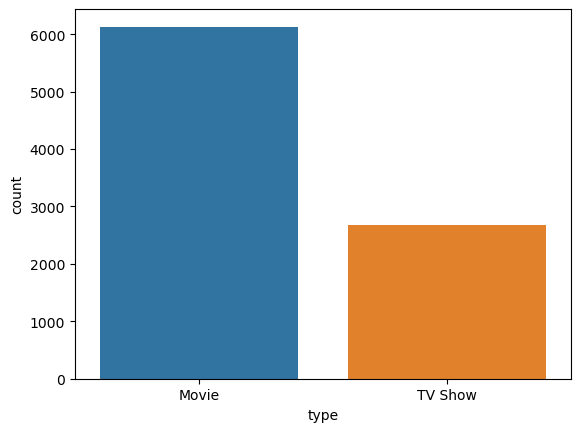

In [14]:
sns.countplot(x = 'type', data = Nt) #checking the number of unique values in the column
plt.show()

In [15]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December'] #creating a list of months
NT = Nt.groupby('year')['month'].value_counts().unstack()[month_order] #grouping the data by year and month

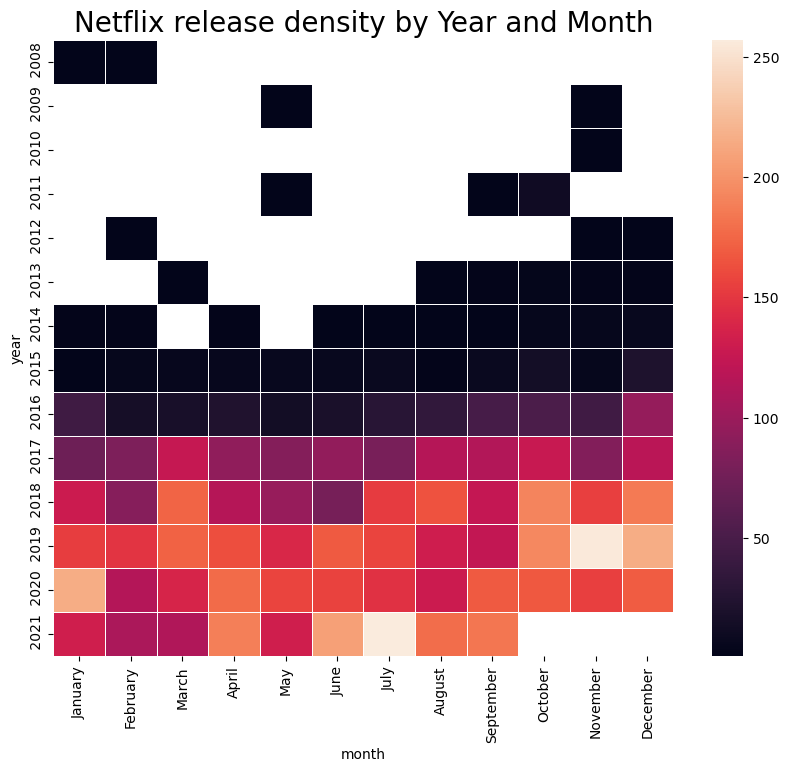

In [16]:
# Create a figure and axis for the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the heatmap on the axis
sns.heatmap(NT, linewidths=0.5, ax=ax)

# Set the title of the plot
plt.title('Netflix release density by Year and Month', fontsize=20)

# Show the plot
plt.show()

In [17]:
Movies = (Nt['type'] == 'Movie')  #creating a new column for movies
Movies_df = Nt[Movies] #creating a new dataframe for movies
Movies_df.head()  #printing the first 5 rows of the dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,September,2021


In [18]:
TV_Show = (Nt['type'] == 'TV Show') #creating a new column for TV Shows
TV_Show_df = Nt[TV_Show] #creating a new dataframe for TV Shows
TV_Show_df.head() #displaying the first 5 rows of the dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021


In [19]:
genres = {}  #creating a dictionary to store the genres of the movies 
for genre in  Movies_df['listed_in']: #creating a dictionary for the genres
    for i in genre.split(','):  #splitting the genres into individual words
        if i not in genres: 
            genres[i] = 1  #if the word is not in the dictionary, then add it with a count of 1
        else:
            genres[i] += 1  #incrementing the count of the genre

In [20]:
genres_df = pd.DataFrame(list(genres.items()), columns = ['Genre','Count']) #creating a dataframe for the genres
genres_df['Genre'].unique() #checking the number of unique values in the column

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       ' Independent Movies', ' International Movies', 'Comedies',
       ' Dramas', ' Comedies', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' Thrillers', 'Action & Adventure', ' Classic Movies',
       ' Horror Movies', ' Anime Features', ' Sports Movies',
       'International Movies', 'Sci-Fi & Fantasy', ' Cult Movies',
       'Classic Movies', ' Children & Family Movies',
       ' Faith & Spirituality', ' LGBTQ Movies', 'Stand-Up Comedy',
       'Movies', 'Anime Features', ' Documentaries', 'Cult Movies',
       'Independent Movies', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', ' Stand-Up Comedy', 'Sports Movies'], dtype=object)

In [21]:
genres_df.sort_values(by = 'Count', ascending = False).head() #sorting the dataframe in descending order

,Genre,Count
4,International Movies,2624
2,Dramas,1600
5,Comedies,1210
14,Action & Adventure,859
0,Documentaries,829


ValueError: min() arg is an empty sequence

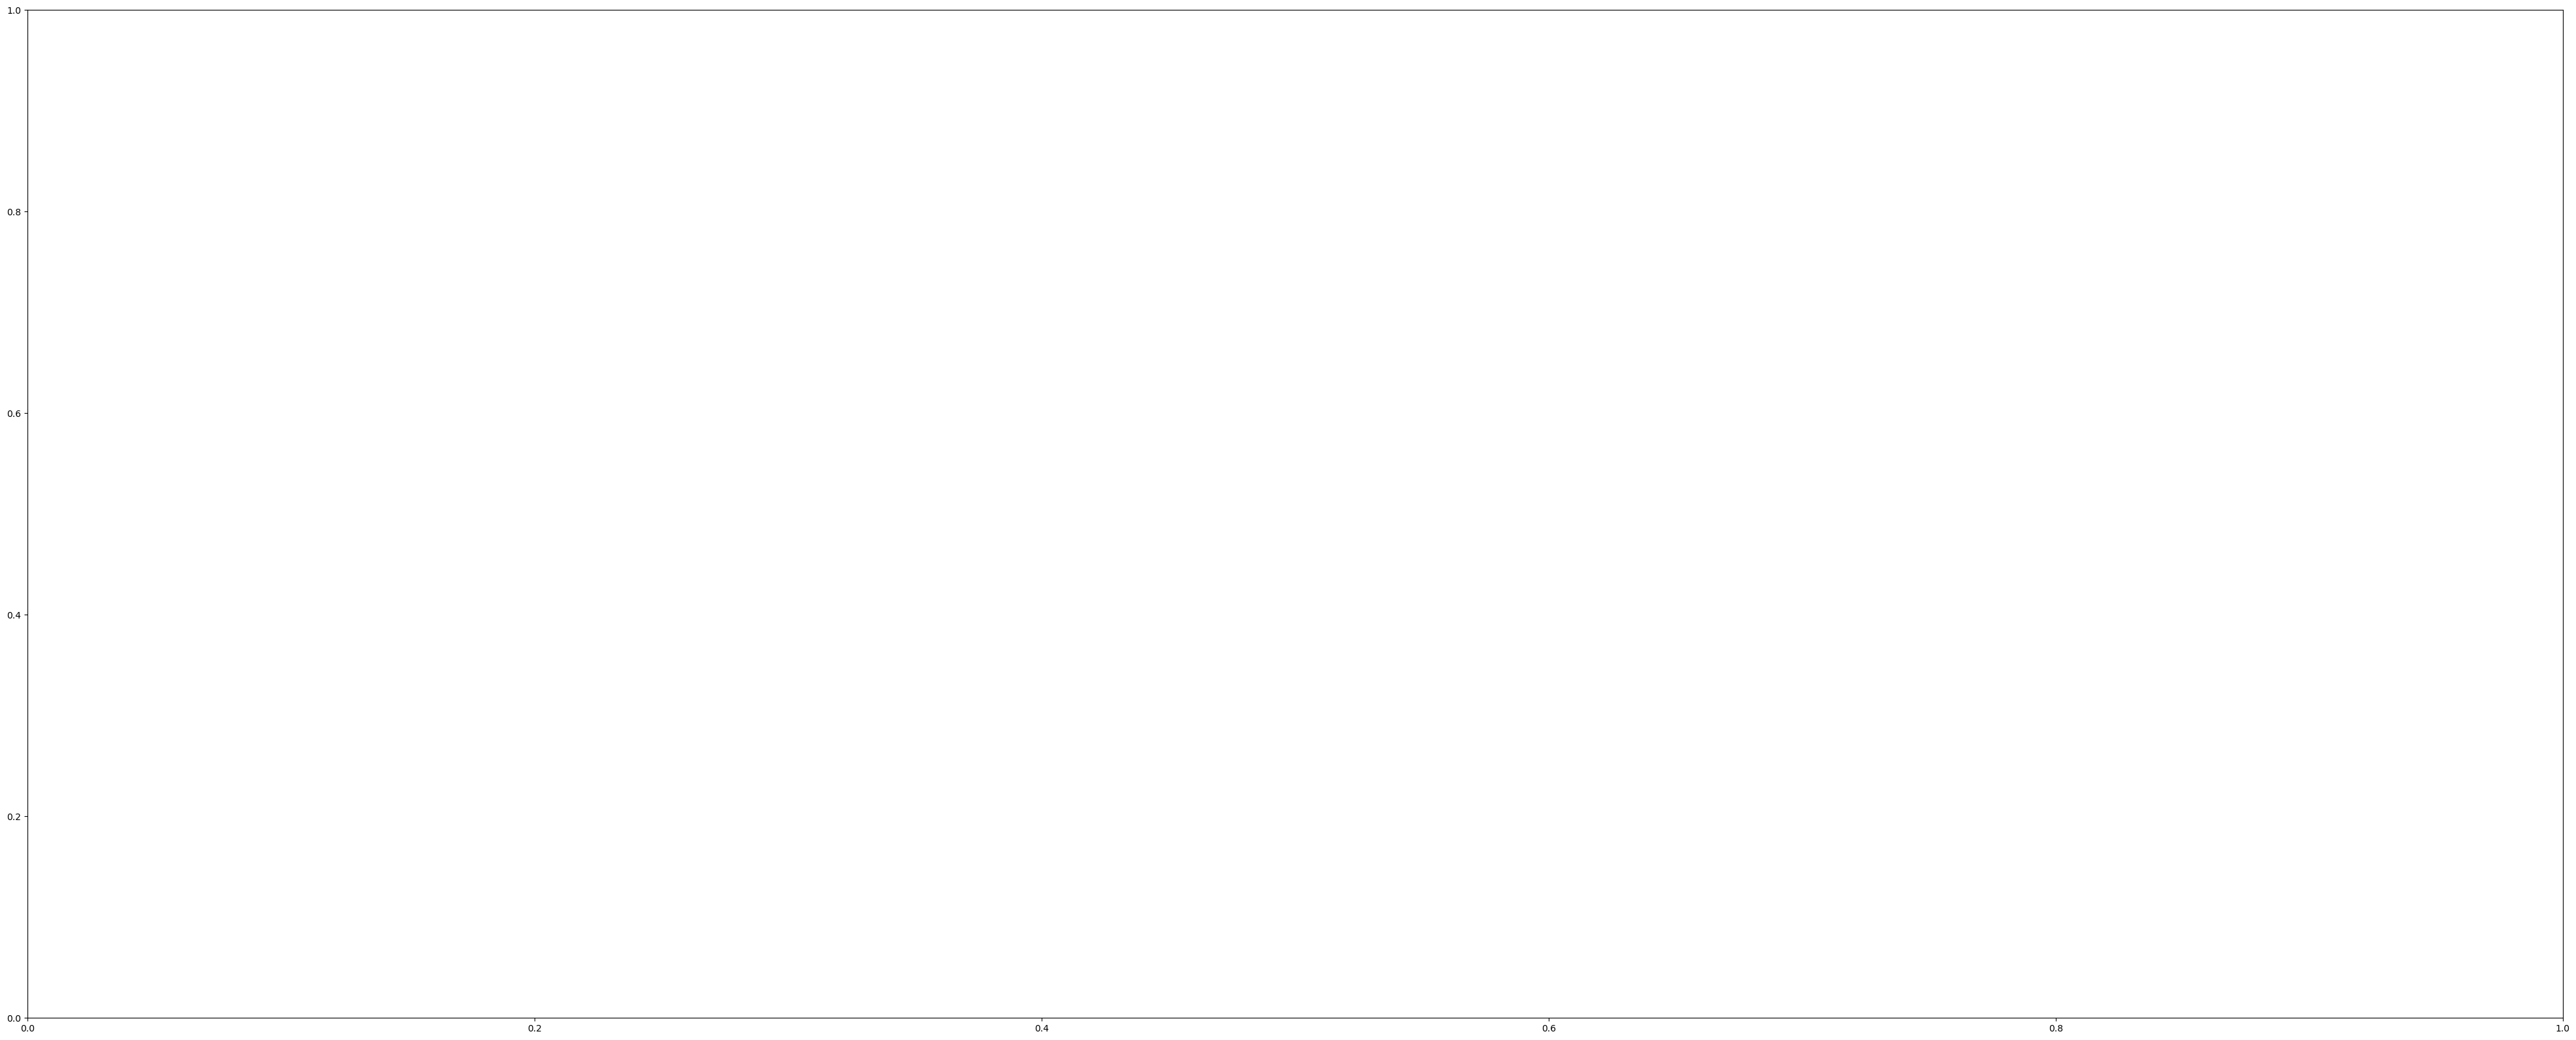

In [22]:
fig, ax = plt.subplots(figsize = (50, 20)) #creating a figure and axis for the plot
sns.barplot(y = 'Genre', x = 'Count', data = genres_df.sort_values(by = 'Count', ascending = False).loc[0:5]) #plotting the barplot
plt.tick_params(labelsize = 20) #setting the font size of the labels
plt.show() #displaying the plot

In [23]:
genres2 = {}  #creating a dictionary to store the genres of the TV Shows
for genre2 in TV_Show_df['listed_in']: #creating a dictionary for the genres
    for i in genre2.split(','):  #splitting the genres into individual words
        if i not in genres2: 
            genres2[i] = 1  #if the word is not in the dictionary, then add it with a count of 1
        else:
            genres2[i] += 1  #incrementing the count of the genre

In [24]:
genres_df = pd.DataFrame(list(genres2.items()), columns = ['Genre','Count']) #creating a dataframe for the genres
genres_df['Genre'].unique() #checking the number of unique values in the column

array(['International TV Shows', ' TV Dramas', ' TV Mysteries',
       'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'British TV Shows', ' Docuseries', ' Crime TV Shows',
       'TV Comedies', ' Spanish-Language TV Shows', ' TV Thrillers',
       "Kids' TV", ' TV Sci-Fi & Fantasy', 'Reality TV', 'Anime Series',
       " Kids' TV", ' Korean TV Shows', ' Science & Nature TV',
       ' Teen TV Shows', 'TV Shows', 'TV Action & Adventure',
       'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV',
       ' Stand-Up Comedy & Talk Shows', 'Romantic TV Shows', 'TV Horror',
       'Spanish-Language TV Shows', ' Classic & Cult TV',
       'TV Sci-Fi & Fantasy'], dtype=object)

In [25]:
genres_df.sort_values(by = 'Count', ascending = False).head() #sorting the dataframe in descending order

,Genre,Count
0,International TV Shows,774
1,TV Dramas,696
4,International TV Shows,577
9,TV Comedies,461
3,Crime TV Shows,399


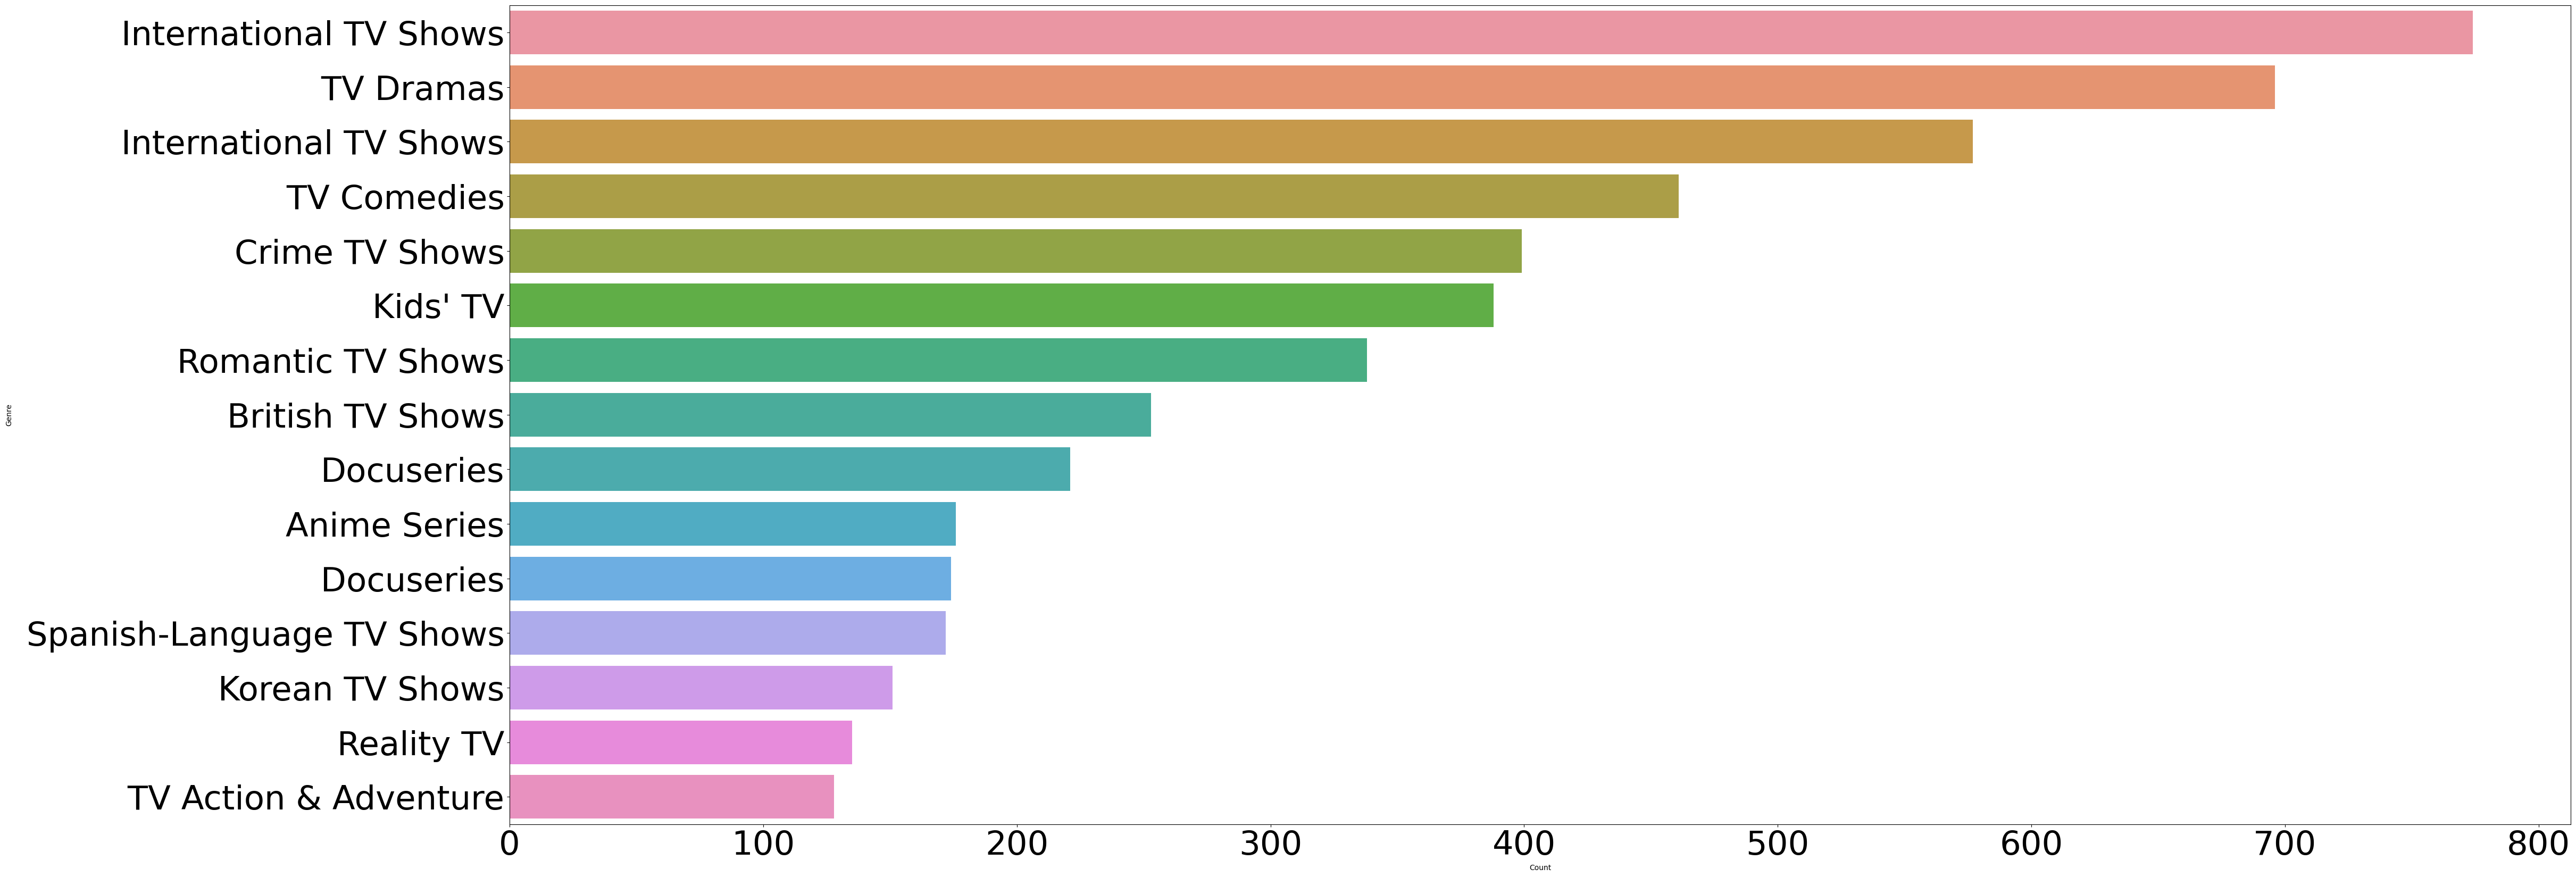

In [26]:
fig, ax = plt.subplots(figsize = (50, 20))  #creating a figure and axis for the plot
sns.barplot(y = 'Genre', x = 'Count', data = genres_df.sort_values(by = 'Count', ascending = False).loc[0:5]) #plotting the barplot
plt.tick_params(labelsize = 45) #setting the font size of the labels
plt.show() #displaying the plot

In [27]:
PP = Nt.groupby('release_year')['type'].value_counts().unstack(level = -1)  #grouping the data by year and type

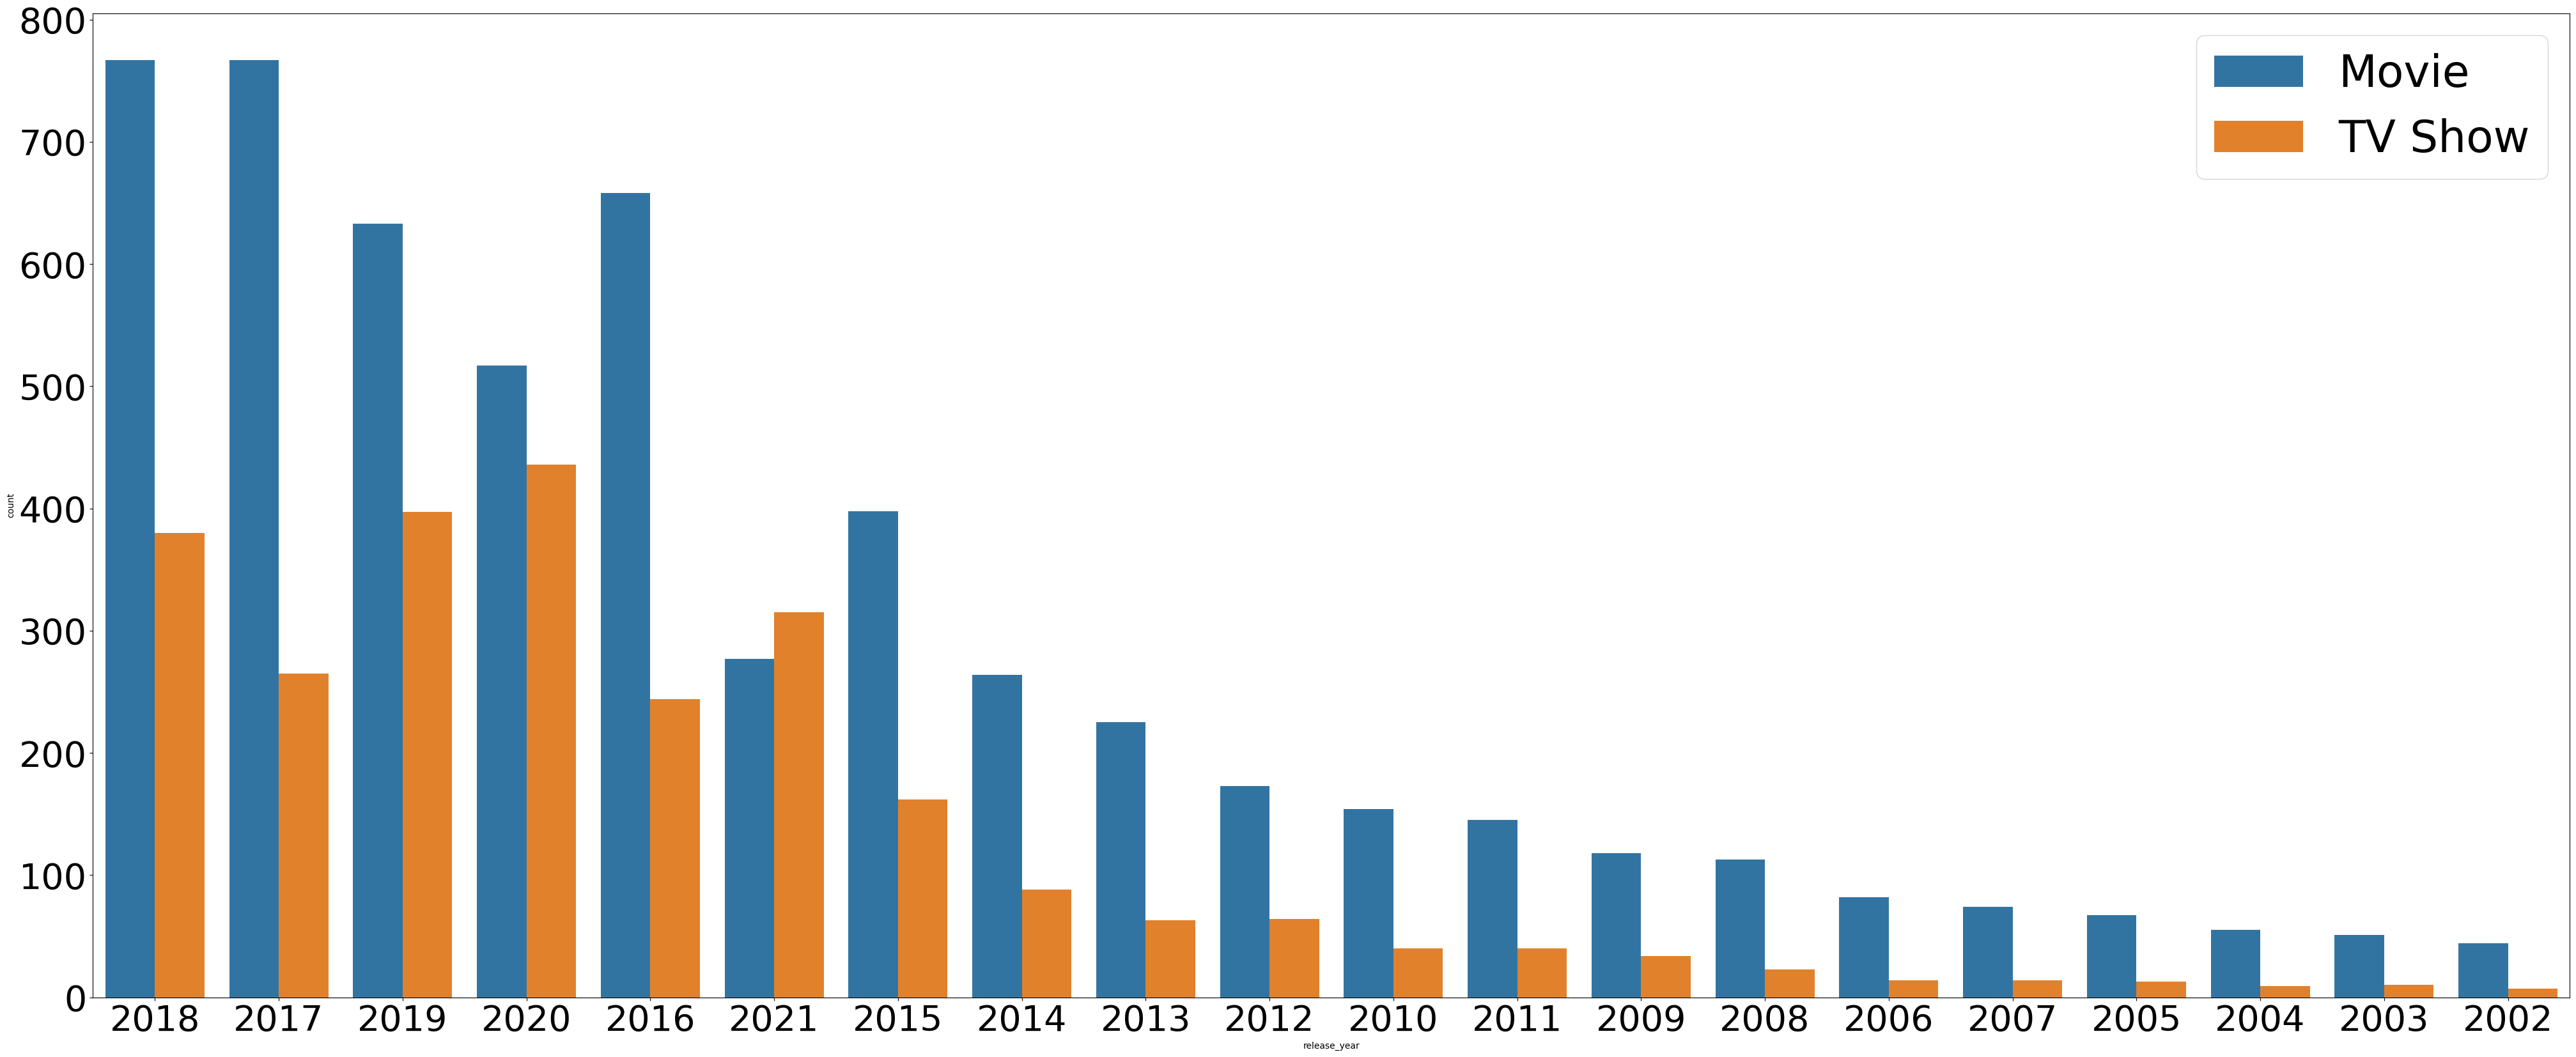

In [28]:
fig, ax = plt.subplots(figsize = (50, 20))  #creating a figure and axis for the plot
y = sns.countplot(x = 'release_year', data = Nt,  hue = 'type', order = Nt['release_year'].value_counts().index[0:20])  #plotting the barplot
plt.tick_params(labelsize = 40)  #setting the font size of the labels
y.legend(fontsize = 50)  #setting the font size of the labels

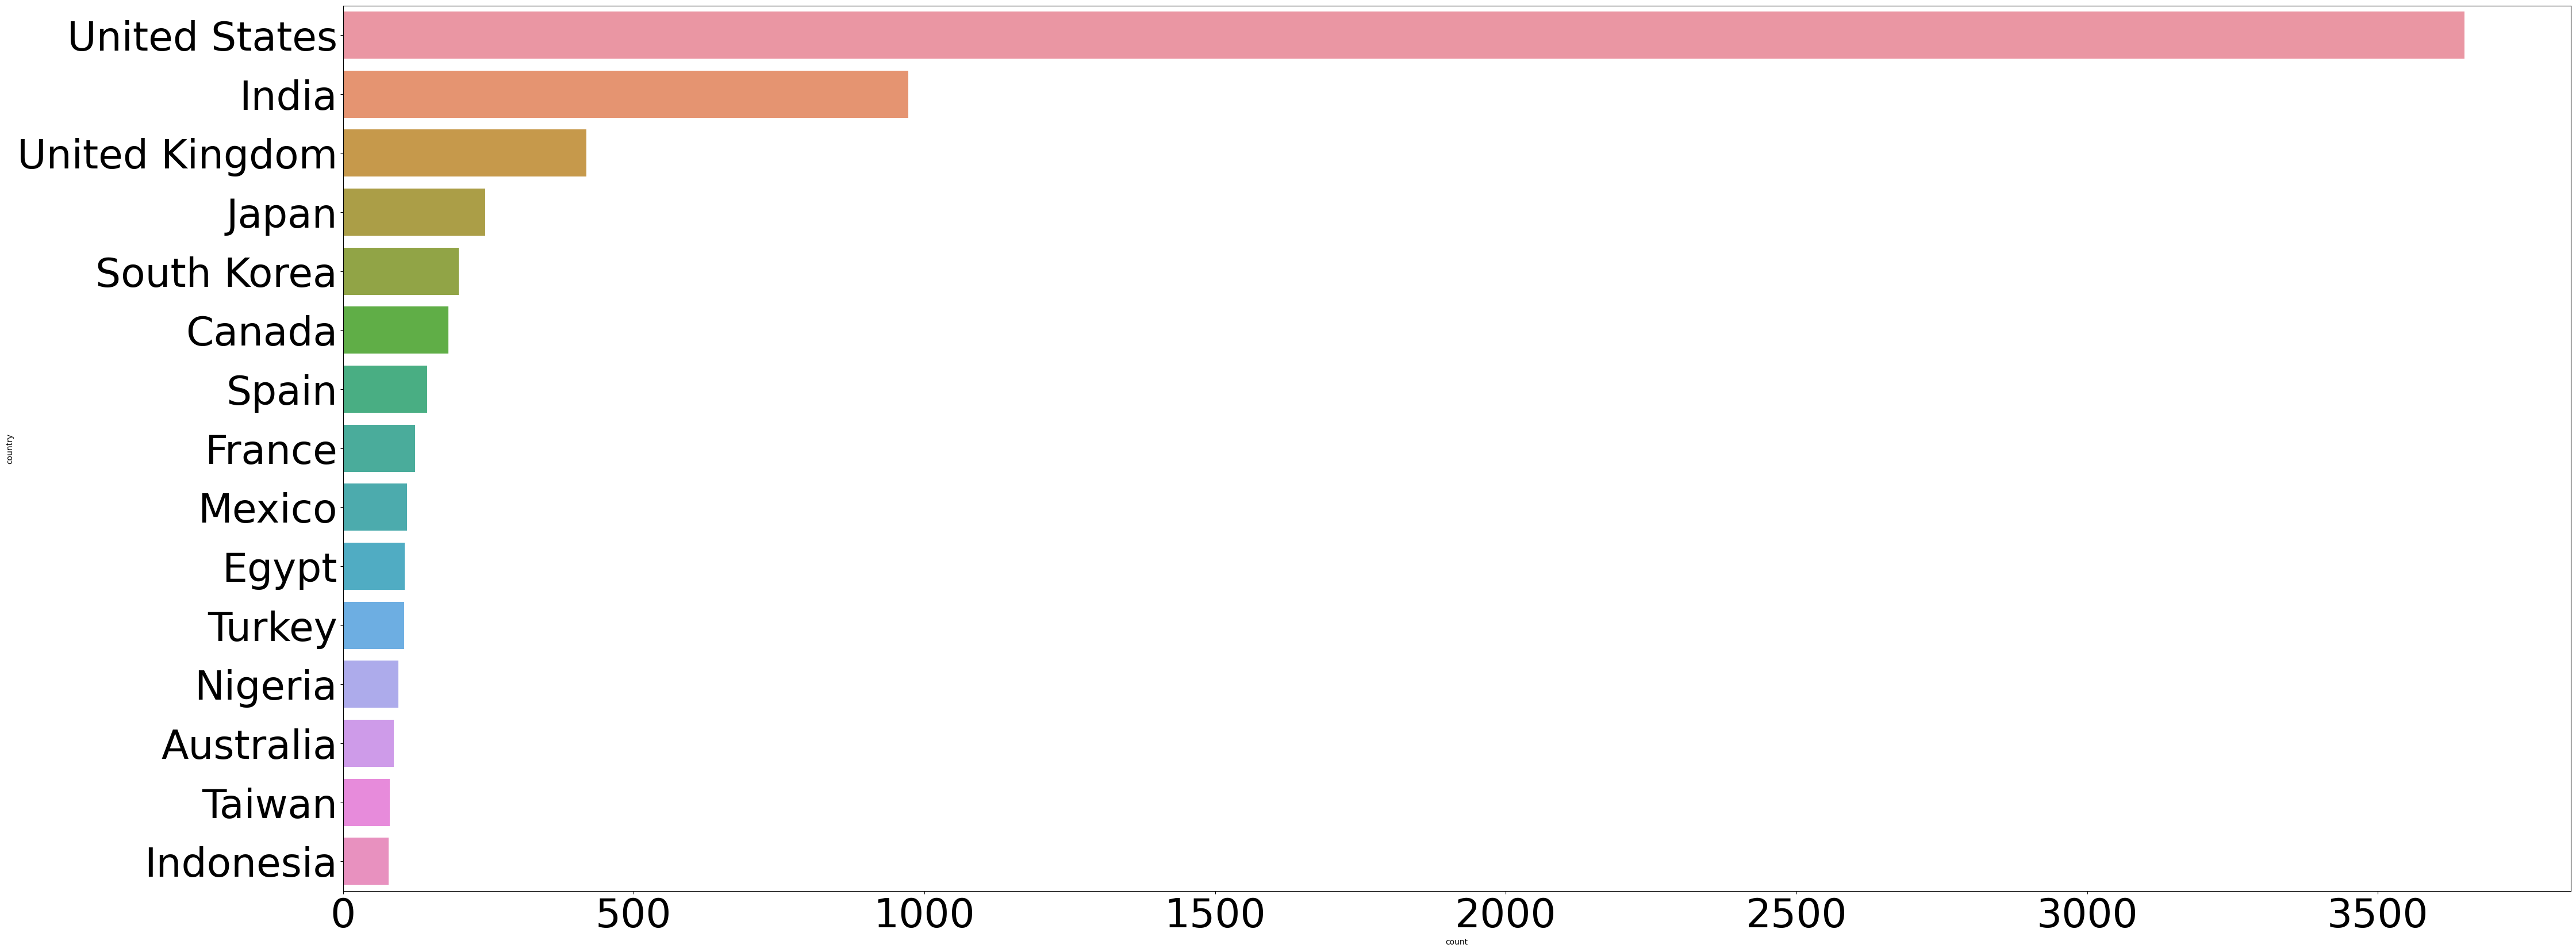

In [29]:
fig, ax = plt.subplots(figsize = (50, 20))  #creating a figure and axis for the plot
y = sns.countplot(y = 'country', data = Nt, order = Nt['country'].value_counts().index[0:15])  #plotting the barplot
plt.tick_params(labelsize = 50)  #setting the font size of the labels
plt.show( )  #displaying the plot

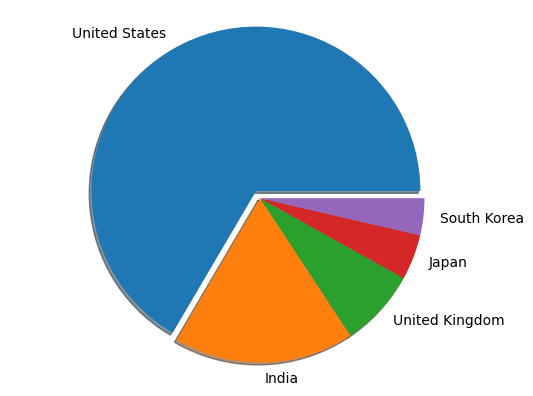

In [30]:
sizes = Nt['country'].value_counts()  #creating a list of the sizes of the countries
z = np.zeros(748)  #creating an array of zeros
z[0] = 0.1  #setting the first value of the array to 0.1

labels = []  #creating an empty list for the labels
for i in Nt['country'].value_counts()[:5].index:  #looping through the top 5 countries
    labels.append(i)  #appending the labels to the list

fig, ax = plt.subplots()  #creating a figure and axis for the plot
explode = (0.1, 0, 0, 0)  #creating an array of zeros
ax.pie(sizes[:5], explode = z[:5], labels = labels, radius = 2, shadow = True, )  #plotting the pie chart 
ax.axis('equal')  #setting the equal aspect ratio for the plot
plt.show()  #displaying the plot

In [31]:
Movies_df['duration'] =  Movies_df['duration'].str.replace(" min", "").str.replace("Season", " ").str.strip()  #removing the minutes from the duration column
Movies_df['duration'] = Movies_df['duration'].astype('int32')  #converting the column to integer

In [32]:
Duration = Movies_df[Movies_df['duration'] > 1]  #creating a new dataframe for movies with duration greater than 1
Duration.head()  #displaying the first 5 rows of the dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,September,2021


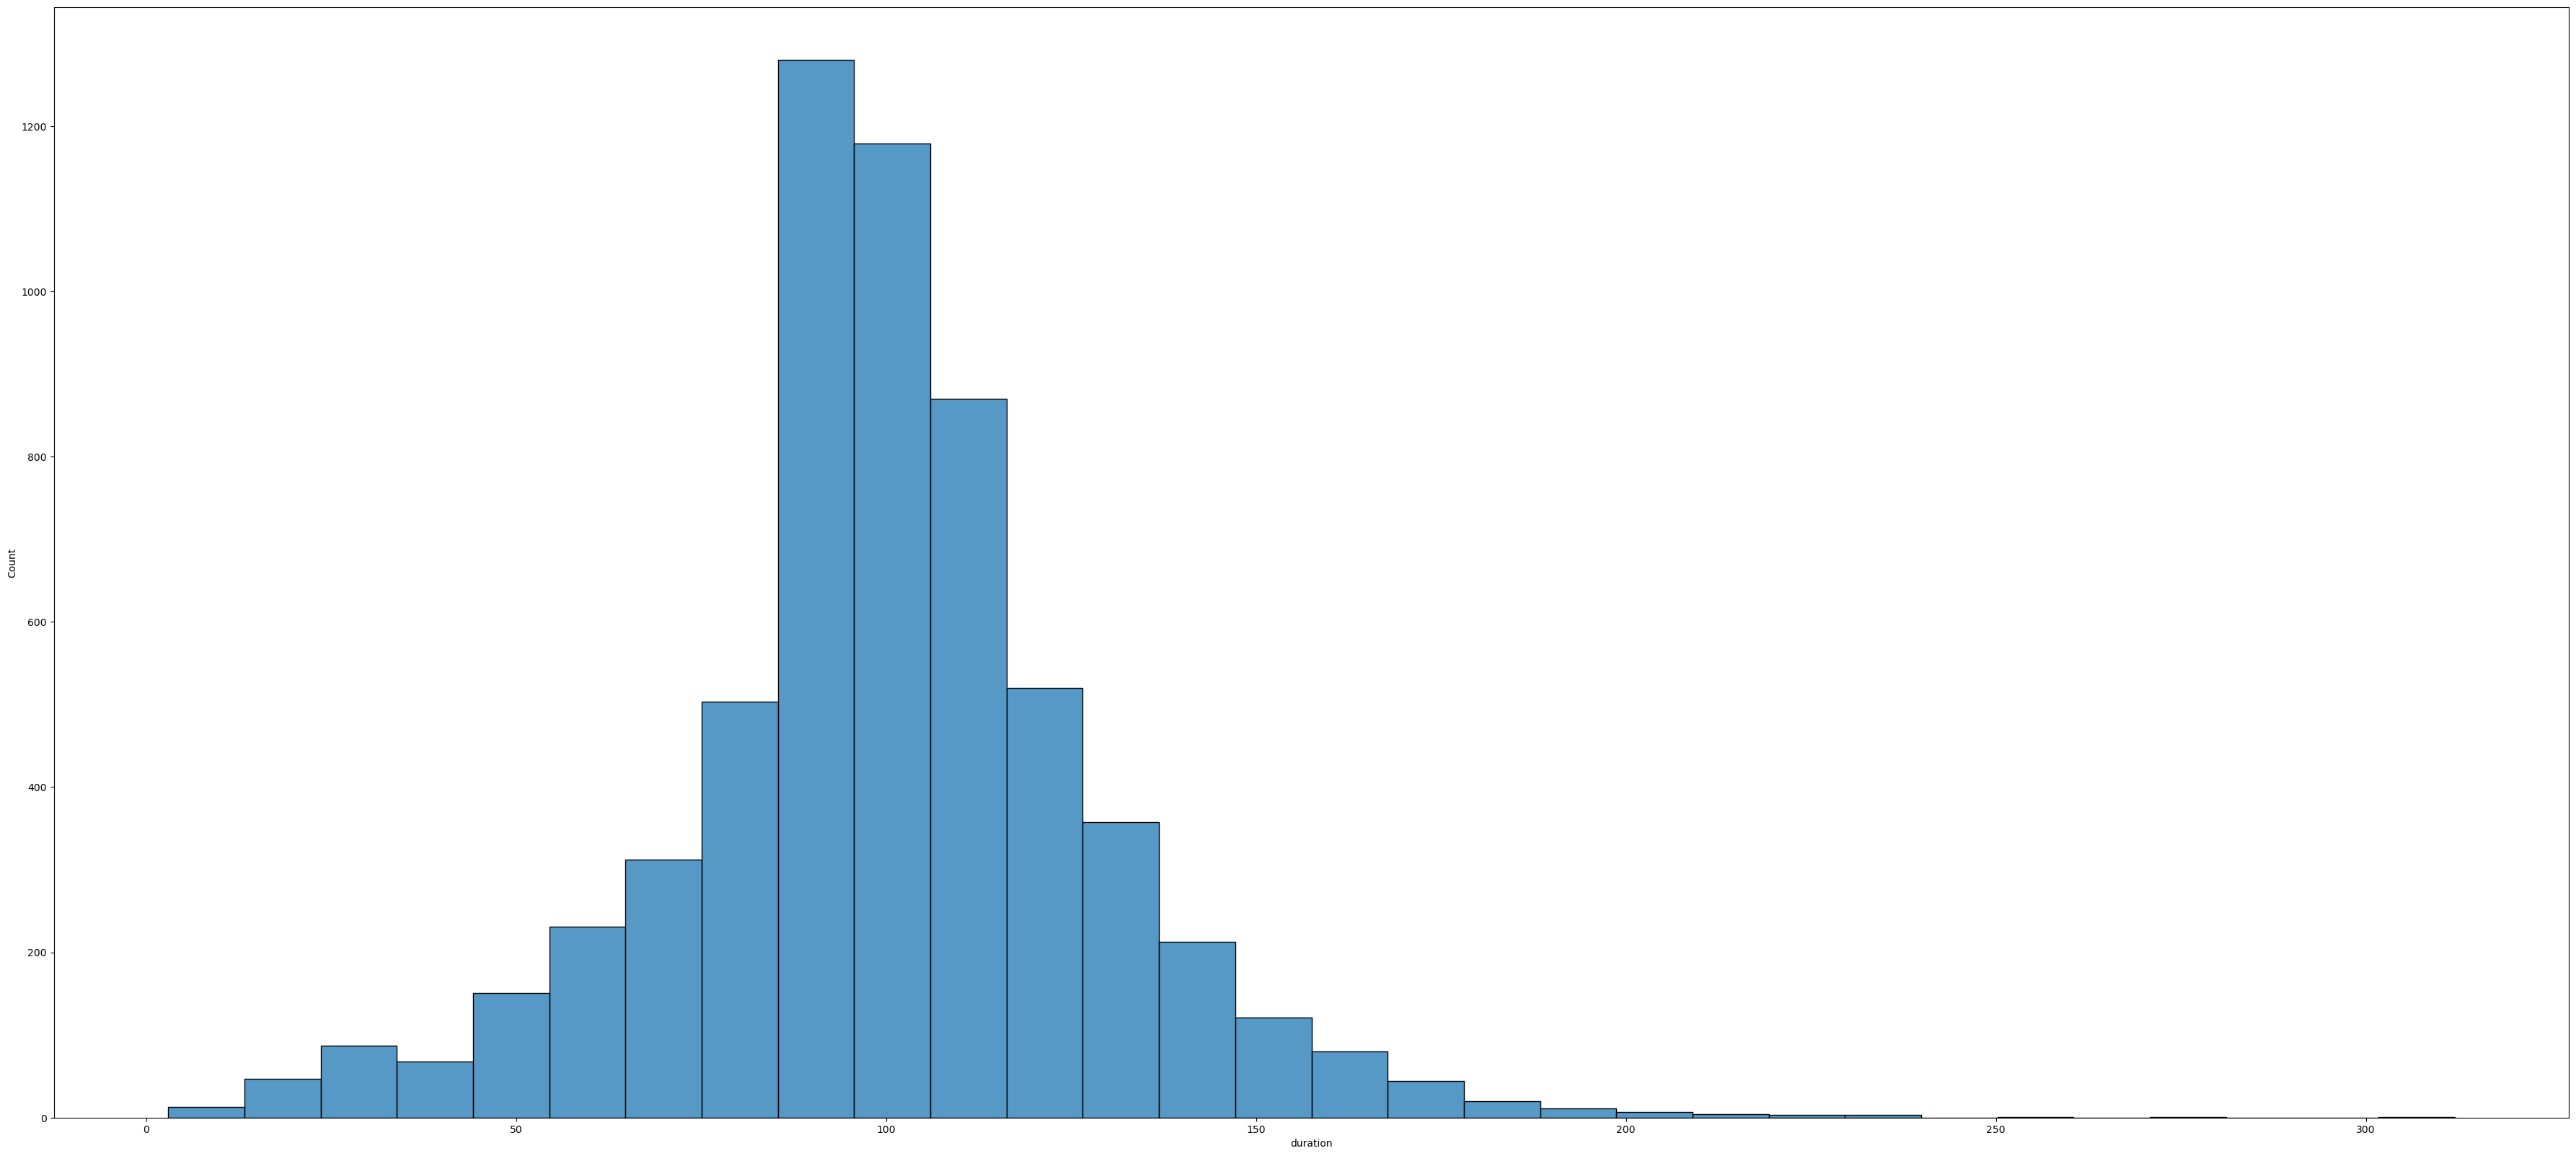

In [33]:
plt.figure(figsize = (45, 20))  #creating a figure and axis for the plot
ax = sns.histplot(x = Duration['duration'], data =  Duration, bins = 30)  #plotting the histogram

In [34]:
# Removing non-numeric characters from 'duration'
TV_Show_df['duration'] = TV_Show_df['duration'].str.replace(r'\D', '', regex=True)

# Converting 'duration' to integer
TV_Show_df['duration'] = TV_Show_df['duration'].astype('int32')

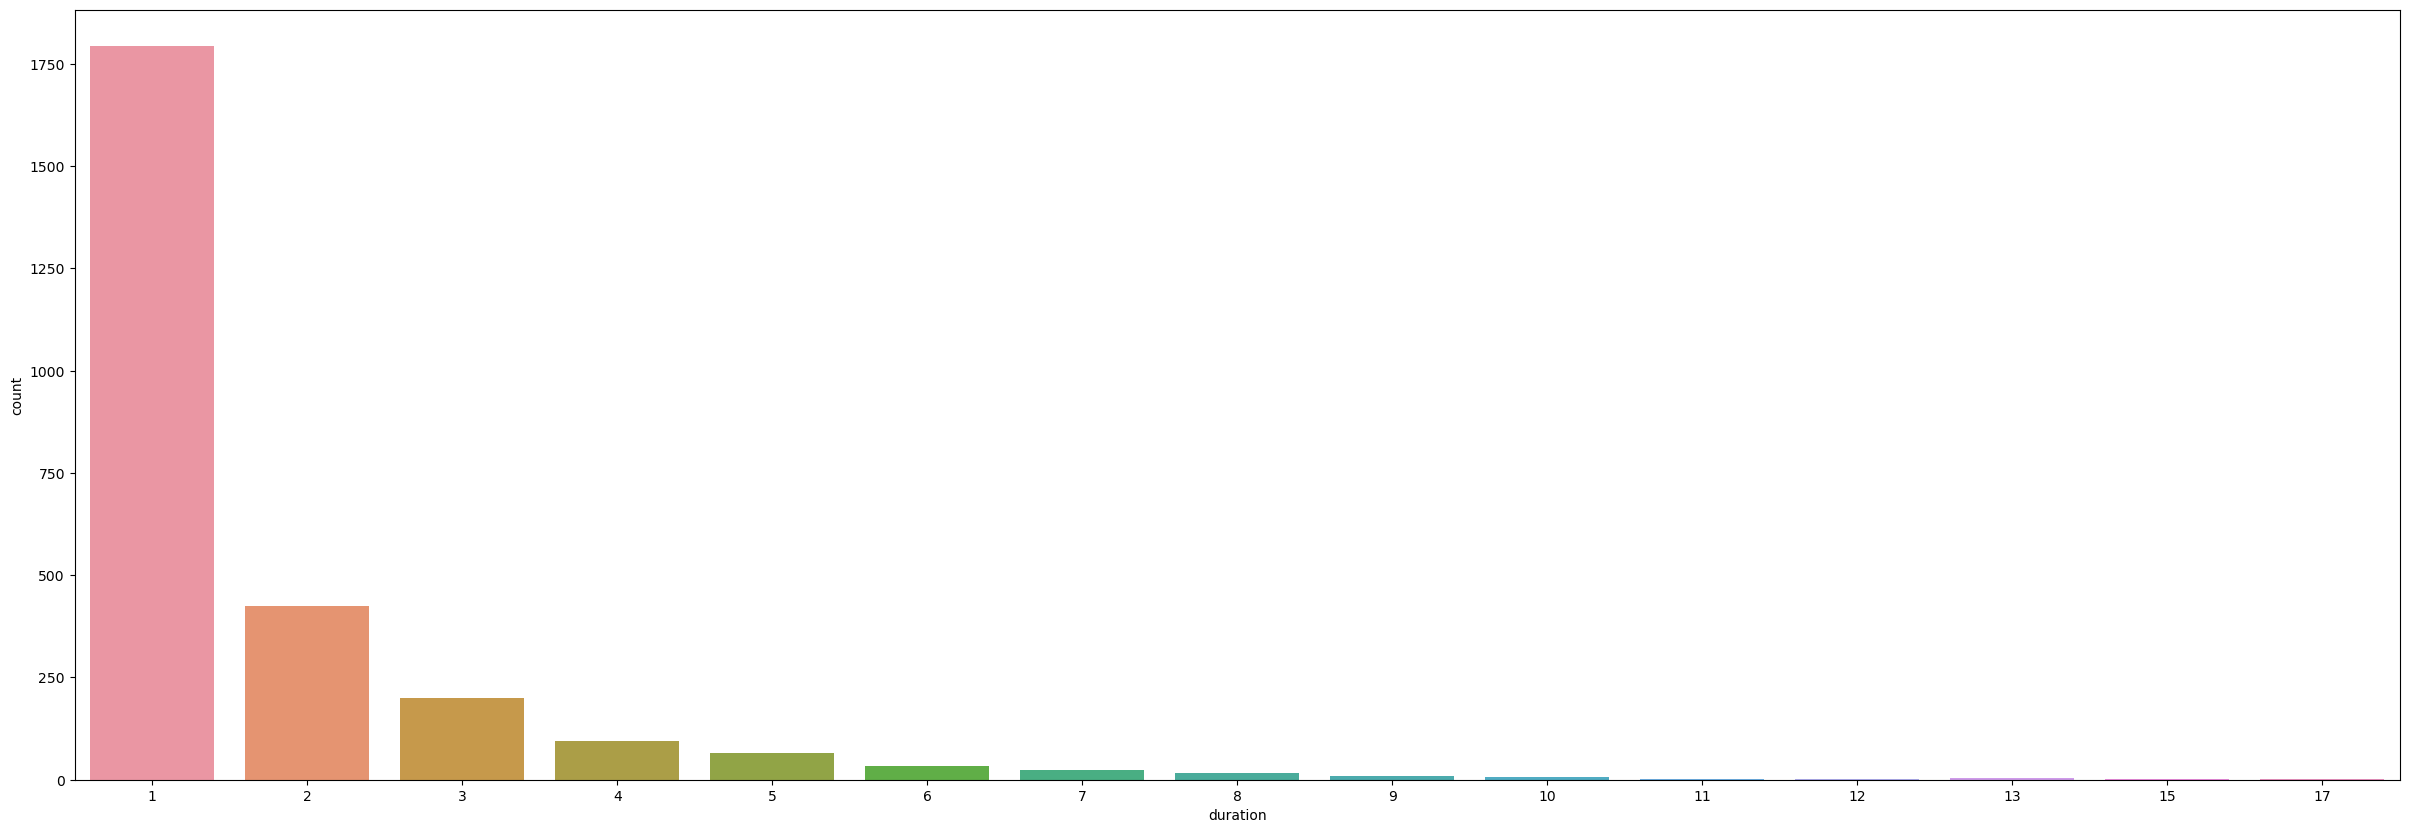

In [35]:
plt.figure(figsize=(30,10))  #creating a figure and axis for the plot
ax = sns.countplot(x= TV_Show_df['duration'], data=TV_Show_df)  #plotting the barplot
plt.show()  #displaying the plot

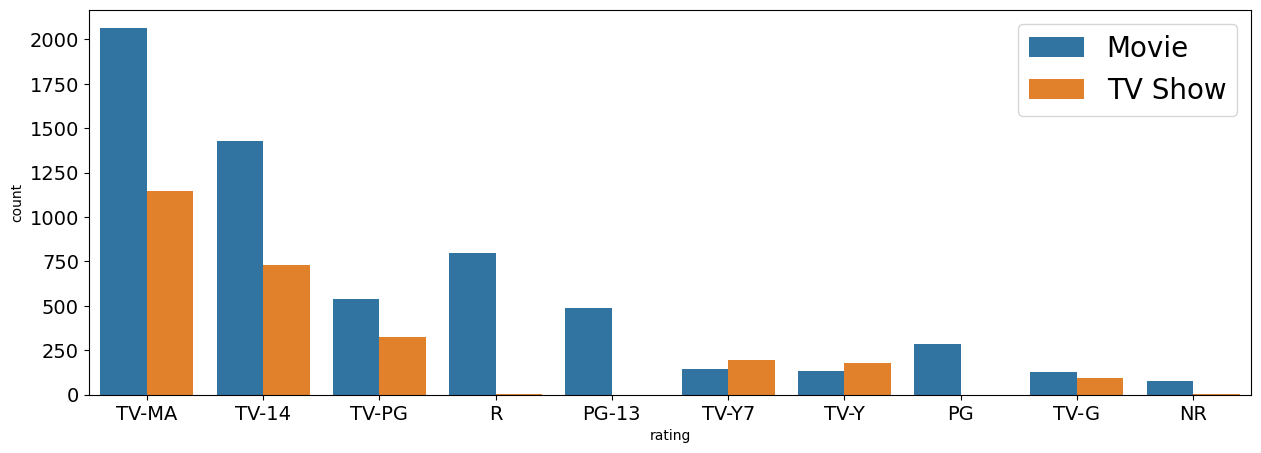

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,5))  #creating a figure and axis for the plot

plt.tick_params(labelsize=14)  #setting the font size of the labels
ax = sns.countplot(x='rating', data=Nt, hue='type',
                   order=Nt['rating'].value_counts().index[0:10])
plt.legend(fontsize=20)

plt.show()  #displaying the plot

In [37]:
TV_Show_df[['duration','title']].sort_values(by='duration', ascending =False).head(3)

,duration,title
548,17,Grey's Anatomy
2423,15,Supernatural
4798,15,NCIS


In [38]:
Nt.to_excel('output.xlsx', index=False)  #saving the dataframe as an excel file